**New Sales Strategy for Sales Superstore A to Z**
Made by Maria Angelica Camargo, Daniel Reyes and Budssakon Satta.

Before begining, we import the dataset and the libraries we are going to need.

In [12]:

import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sb
import numpy as np
from pandas import DataFrame

df = pd.read_csv('sales.csv')

First we calculate the profit ratio to see if the company has been able to convert eficiently the sales to revenue.

We do that for each cateogry and each year to indentify trends.

In [15]:
#Ratio between the sum of profits and the sum of sales for  each category  and each year
df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')  # Convert to numeric, errors become NaN
sums = df.groupby(['Category', 'Order Year']).sum().reset_index()
sums['Profit_Sales_Ratio'] = sums['Profit'] / sums['Sales']   

We will visualize the results on a line plot graph to facilitate the analysis. 

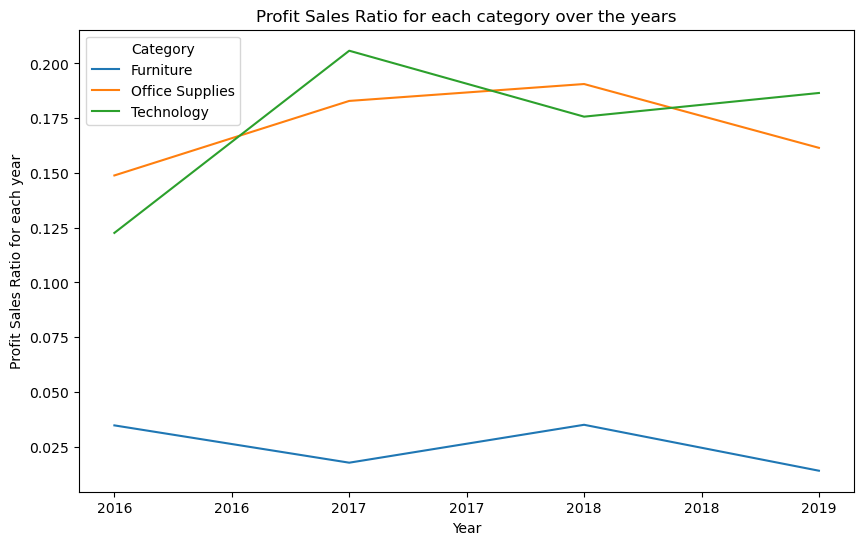

In [18]:
#Visualization
plt.figure(figsize=(10, 6))
chart = sb.lineplot(data=sums, x='Order Year', hue='Category', y='Profit_Sales_Ratio', errorbar=None)
chart.set_title('Profit Sales Ratio for each category over the years')
chart.set_xlabel('Year')
chart.set_ylabel('Profit Sales Ratio for each year')
chart.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.show()

**Analysis of the Profit Sales Ratio for each category over the years**

The highest performing categories over the years have been Technology and Office Supplies. However, in 2019, Office Supplies experienced a decrease in their profit ratio, positioning Technology as the leading category in terms of profit ratio. Historically, Furniture has maintained the lowest profit ratio.


Even tough the last graph is informative is not enough to have a good insight, therefore we are also finding the profit for each category.

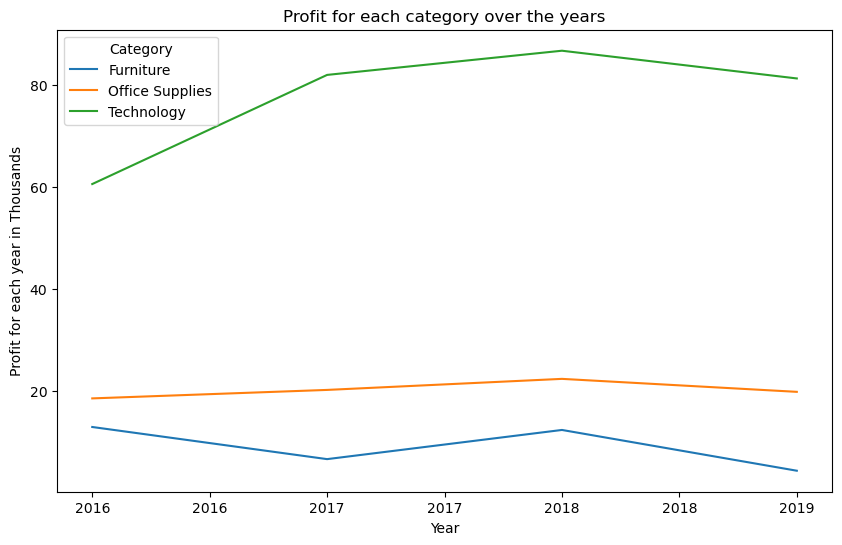

In [173]:
plt.figure(figsize=(10, 6))
chart = sb.lineplot(data=df, x='Order Year', hue='Category', y='Profit', errorbar=None)
chart.set_title('Profit for each category over the years')
chart.set_xlabel('Year')
chart.set_ylabel('Profit for each year in Thousands')
chart.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.show()

**Analysis of the Profit Sales Ratio for each category over the years**

The graph clearly shows that Technology has been the most profitable category over the years. While both Office Supplies and Technology have positive profits, the magnitude of profit for Office Supplies is almost four times less than Technology. This reinforces the dominance of Technology in terms of profitability.


***Analysis of the profit vs profit ratio for each category***

High profit with a low profit ratio indicates inefficiency in converting revenue into profit. On the other hand, low profit with a high profit ratio suggests a potential for scaling up, as seen in the Office Supplies category. High profit with a high profit ratio points to an ideal business situation, which is where Technology stands. Conversely, low profit with a low profit ratio shows a need to better leverage revenue into profit, as seen in Furniture.

***Key Point 1:*** The Sales strategy for next year should focus on Office Supplies, given its high profit ratio and potential for scale.

Taking this into account, we have decided to focus further analysis on the Office Supplies category. This decision is driven by the high profit ratio of Office Supplies, indicating a strong foundation with the potential to grow substantially if given the right strategic attention. By identifying and addressing the inefficiencies in Office Supplies, we can unlock significant growth and improve the overall profitability of our business.

However, Office Supplies is indeed a broad category, and diving into the performance of each subcategory can give us more targeted insights.

In [23]:
Office=df[(df.Category == 'Office Supplies')]
#Ratio between the sum of profits and the sum of sales for  each subcateogry and each year for the category Office Supplies
sumsOffice = Office.groupby(['Sub-Category', 'Order Year']).sum().reset_index()
sumsOffice['Profit_Sales_Ratio'] = sumsOffice['Profit'] / sumsOffice['Sales']   


In [25]:
# Define a consistent color palette (seaborn)
sub_categories = sumsOffice['Sub-Category'].unique()

# Create a color palette
palette = sb.color_palette("tab10", len(sub_categories))
color_dict = dict(zip(sub_categories, palette))



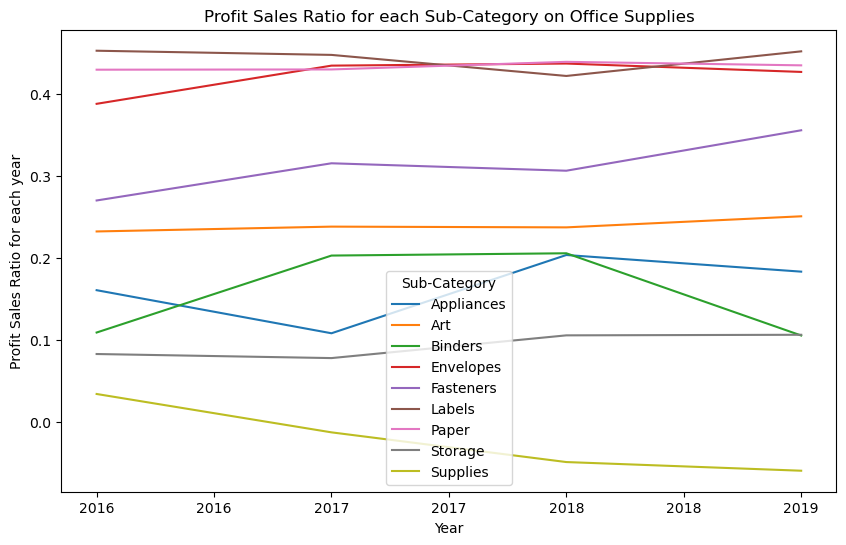

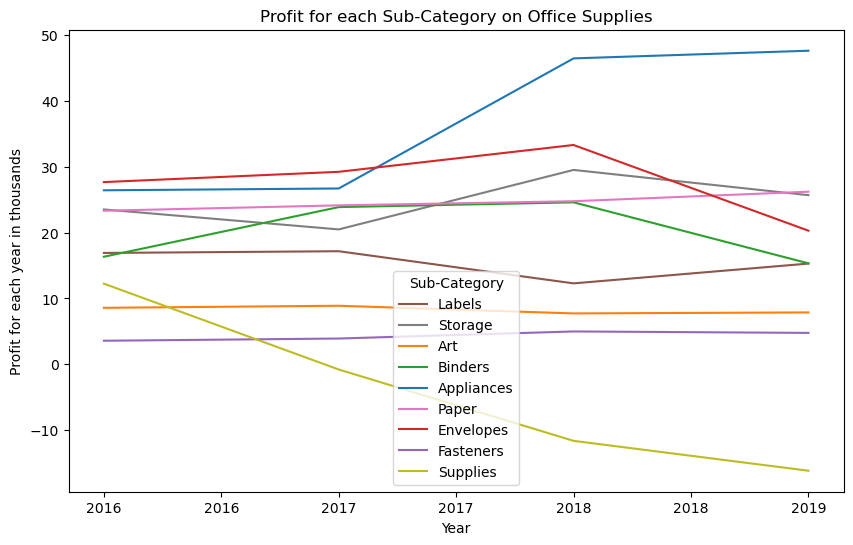

In [27]:
#Profit ratio
plt.figure(figsize=(10, 6))
chart = sb.lineplot(data=sumsOffice, x='Order Year', hue='Sub-Category', y='Profit_Sales_Ratio', palette=color_dict, errorbar=None)
chart.set_title('Profit Sales Ratio for each Sub-Category on Office Supplies')
chart.set_xlabel('Year')
chart.set_ylabel('Profit Sales Ratio for each year')
chart.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.show()

# Profit 
plt.figure(figsize=(10, 6))
chart = sb.lineplot(data=Office, x='Order Year', hue='Sub-Category', y='Profit', palette=color_dict, errorbar=None)
chart.set_title('Profit for each Sub-Category on Office Supplies')
chart.set_xlabel('Year')
chart.set_ylabel('Profit for each year in thousands')
chart.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.show()

****Key Point 2:**** ***Analysis of the profit vs profit ratio for each Sub Category on Office Supplies***

High profit with low profit ratio indicates inefficiency to convert to profit being this the case for Appliances ans Storage. On other hand, low profit with high profit ratio indicates potential for scale with is where Labels, Envelopes and Fasteners stands. Finally, the high profit with high profit ratio for papers indicates sweet spot in business. 

This breakdown reveals several areas with distinct strategic needs. For instance, focusing on Appliances and Storage might involve identifying and addressing inefficiencies in conversion processes. On the other hand, enhancing the performance of Labels, Envelopes, and Fasteners could involve scaling up operations to maximize their high profit ratios. Paper’s strong standing as a high profit and high-profit ratio subcategory suggests a need to maintain and perhaps expand this profitable segment. Finally, addressing the inefficiencies in Art, Binders, and Supplies might involve a comprehensive review of their operations and revenue strategies.

In order to keep increasing the profits of the category Office Supplies, we want to find out the **optimal percentaje of discounts**.


C:\Users\57305\AppData\Local\Temp\ipykernel_31908\3822189396.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Office['Discount Range'] = pd.cut(Office['Discount'], bins=bins, labels=labels)
C:\Users\57305\AppData\Local\Temp\ipykernel_31908\3822189396.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_agg = Office.groupby('Discount Range').agg({'Profit': 'sum', 'Sales': 'sum'}).reset_index()


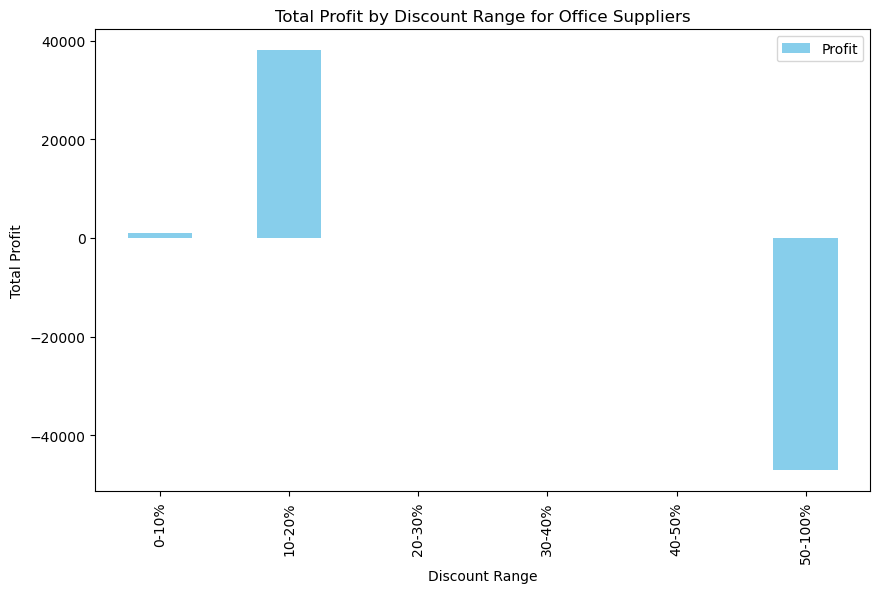

In [38]:
# Create discount ranges (bins)
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 1]  # Adjust the bin ranges based on your data
labels = ['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50-100%']

# Add a new column for discount bins
Office['Discount Range'] = pd.cut(Office['Discount'], bins=bins, labels=labels)


# Group by 'Discount Range' and calculate the sum of 'Profit' and 'Sales'
discount_agg = Office.groupby('Discount Range').agg({'Profit': 'sum', 'Sales': 'sum'}).reset_index()

# Calculate Profit Ratio = Profit / Sales
discount_agg['Profit Ratio'] = discount_agg['Profit'] / discount_agg['Sales']

# Plot the total profit for each discount range
discount_agg.plot(x='Discount Range', y='Profit', kind='bar', figsize=(10, 6), color='skyblue')

plt.title('Total Profit by Discount Range for Office Suppliers')
plt.ylabel('Total Profit')
plt.xlabel('Discount Range')
plt.show()

The relationship between discount levels and profit is not linear, and certain discount ranges either boost profitability or severely reduce it.

Starting with the 0-10% discount range, the profit remains very close to zero. This suggests that offering minimal discounts in this range neither contributes to substantial gains nor causes significant losses. It appears that discounts of this size might not be enough to incentivize customers to increase their purchases significantly, or alternatively, the marginal increase in sales that results from these small discounts does not lead to meaningful profits.

The most striking observation comes from the 10-20% discount range, which shows a sharp increase in profit. This indicates that within this range, office supplies experience the most favorable profit outcomes. It's likely that discounts in this range successfully motivate customers to make more purchases without sacrificing the company's margins too severely. This range seems to strike the perfect balance between incentivizing sales and maintaining profitability, suggesting that it might be the ideal range for future discount strategies in this product category.

On the other hand, the 50-100% discount range reveals a steep drop in profit, with losses becoming quite significant. Offering discounts at this level likely results in selling products below cost or eroding the profit margin to the point where the sales become unsustainable. This indicates that extreme discounting in the office supplies category is damaging to the bottom line and should be carefully reconsidered. While such discounts may be used for promotional purposes or to clear out inventory, they are clearly not beneficial in terms of overall profitability.

The absence of data in the 20-50% discount range suggests that this range may either be underutilized in the current discounting strategy or has little impact on profits. It's possible that discounts in this range are not frequently offered, or if they are, they do not result in noticeable changes to profitability. Further investigation would be needed to determine whether this is a missed opportunity or simply a reflection of customer behavior specific to this category.

***Key Point 3***:

The analysis suggests that offering discounts in the 10-20% range appears to maximize profitability for office supplies, making it a strategic sweet spot for future pricing decisions. Meanwhile, discounts greater than 50% seem to cause substantial losses, indicating a need for careful consideration when deploying such steep discounts. The minimal effect of discounts below 10% suggests that they are not as effective in driving profitability, and further exploration into mid-range discounts could provide additional insights for optimizing pricing strategy.



Another interesting angle is to analyze which **states are the most profitable**. This can provide us with crucial regional insights to inform our strategic decisions.

In [54]:

Potential_scale_office=Office[(Office['Sub-Category'] == 'Labels')|(Office['Sub-Category'] == 'Envelopes')|(Office['Sub-Category'] == 'Fasteners')]

# Group by 'State' and 'Sub-Category', sum 'Profit' and 'Sales' for Office Suplies
state_subcategory_agg = Potential_scale_office.groupby(['State', 'Sub-Category']).agg({'Profit': 'sum', 'Sales': 'sum'}).reset_index()

# Calculate Profit Ratio = Profit / Sales for Office Supplies
state_subcategory_agg['Profit Ratio'] = state_subcategory_agg['Profit'] / state_subcategory_agg['Sales']

# Sort by 'Profit Ratio' in descending order to see the most profitable
most_profitable_ratio = state_subcategory_agg.sort_values(by='Profit Ratio', ascending=False)


# Plot a bar chart of profit ratio by state and subcategory
# Pivot the data to make it easier to plot
# Each state will have a column, and subcategories will be along the rows
pivot_table = state_subcategory_agg.pivot_table(index='State', values='Profit Ratio', aggfunc='mean')
sorted_pivot_table = pivot_table.sort_values(by='Profit Ratio', ascending=False)
# Plot the pivot table as a bar chart
#pivot_table.plot(kind='bar', figsize=(14, 8))

#plt.title('Profit Ratio by State and Sub-Category')
#plt.ylabel('Profit Ratio')
#plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
#plt.tight_layout()  # Adjust the layout to fit everything

sorted_pivot_table

,Profit Ratio
State,
Louisiana,0.482265
Virginia,0.476917
Oklahoma,0.473725
Iowa,0.472716
Minnesota,0.472645
New Hampshire,0.470986
Montana,0.470000
New Mexico,0.470000
North Dakota,0.470000


**Key point 4**

By examining the profit ratio, the five best-performing states in the United States for the Office Supplies category are Louisiana, Virginia, Oklahoma, Iowa, and Minnesota. This indicates that in these states, sales of office supplies generate high profits for the company. Consequently, if the company is interested in implementing a geographically-based sales strategy for Office Supplies, it should focus on these mentioned states.

On the other hand, the sales strategy for Office Supplies should not prioritize Oregon, Arizona, and Nevada, as these states have the lowest profit ratios. However, since all states show a positive profit ratio, none should be entirely excluded from sales efforts



Based on our analysis, the next step is to examine customer segmentation in the top five most profitable states for the three Office Supplies subcategories that have shown potential for scaling: Labels, Envelopes, and Fasteners. This will allow us to better understand our market in these states and tailor our strategies to maximize profitability within these promising segments.

***Key Point 5: Analysis by consumer segment***

In [140]:
#Create Pivot table1
Top_states=Potential_scale_office[(Potential_scale_office['State'] == 'Louisiana')|(Potential_scale_office['State'] == 'Virgina')|(Potential_scale_office['State'] == 'Oklahoma')|(Potential_scale_office['State'] == 'Iowa')|(Potential_scale_office['State'] == 'Minnesota')]

# Step 2: Filter for specific sub-categories
sub_category_1 = 'Labels'  # Specify sub-category 1 for most profitable segment
sub_category_2 = 'Envelopes'    # Specify sub-category 2 for least profitable segment
sub_category_3 = 'Fasteners'  
# Step 3: Filter the DataFrame for sub-category 1 
filtered_df_1 = Top_states[Top_states['Sub-Category'] == sub_category_1]

# Step 4: Create a pivot table for sub-category 1 
pivot_table_1 = filtered_df_1.pivot_table(
                                index='State',                # Row index: States
                                columns='Segment',            # Column index: Consumer Segments
                                values='Profit',              # Values to aggregate: Profit
                                aggfunc='sum',                # Aggregation function: sum
                                fill_value=0                  # Fill missing values with 0
)

# Replace NaN values with '-'
pivot_table_1 = pivot_table_1.fillna('-').round(2)

# Step 5: Style the pivot table with bold index
styled_pivot_table_1 = pivot_table_1.style.set_properties(**{'font-weight': 'bold'}, subset=pd.IndexSlice[:, :]) \
                                          .set_properties(subset=pd.IndexSlice[:, pivot_table_1.columns], **{'font-weight': 'normal'}) \
                                          .set_caption("Profitabilty of each consumer segment for each state on Labels")

# Display the styled pivot table
styled_pivot_table_1

Segment,Consumer,Corporate,Home Office
State,,,
Louisiana,5.200000,0.000000,0.000000
Minnesota,9.830000,23.180000,43.870000
Oklahoma,6.870000,0.000000,24.310000


The table displays the profitability of each consumer segment across three states (Louisiana, Minnesota, and Oklahoma) for the subcategory "Labels". The three consumer segments analyzed are Consumer, Corporate, and Home Office.

Minnesota stands out as the most profitable state overall, with high profitability in all segments, especially in the Home Office segment (43.87), followed by Corporate (23.18). Oklahoma performs well in the Home Office segment (24.31), indicating a significant contribution from this segment to overall profitability.Louisiana has profitability only in the Consumer segment (5.20), with no recorded profits from the Corporate or Home Office segments.

In conclusion,
Focus on Minnesota: This state demonstrates high profitability across all segments, especially in the Home Office and Corporate segments. Tailoring marketing strategies to target these segments could further increase sales and profits.
Explore Home Office in Oklahoma: Given the high profitability in Oklahoma’s Home Office segment, consider launching promotions or targeted campaigns to solidify and expand this market.
Investigate Louisiana’s Corporate and Home Office segments: Since profitability is concentrated only in the Consumer segment, there may be an opportunity to explore why the other segments are underperforming and to implement strategies to penetrate these markets.

In [142]:
filtered_df_2 = Top_states[Top_states['Sub-Category'] == sub_category_2]

# Step 4: Create a pivot table for sub-category 2
pivot_table_2 = filtered_df_2.pivot_table(
                                index='State',                # Row index: States
                                columns='Segment',            # Column index: Consumer Segments
                                values='Profit',              # Values to aggregate: Profit
                                aggfunc='sum',                # Aggregation function: sum
                                fill_value=0                  # Fill missing values with 0
)

# Replace NaN values with '-'
pivot_table_2 = pivot_table_2.fillna('-').round(2)

# Step 5: Style the pivot table with bold index
styled_pivot_table_2 = pivot_table_2.style.set_properties(**{'font-weight': 'bold'}, subset=pd.IndexSlice[:, :]) \
                                          .set_properties(subset=pd.IndexSlice[:, pivot_table_2.columns], **{'font-weight': 'normal'}) \
                                          .set_caption("Profitabilty of each consumer segment for each state on Envelopes")

styled_pivot_table_2

Segment,Consumer,Corporate,Home Office
State,,,
Iowa,2.880000,0.000000,3.490000
Louisiana,0.000000,30.810000,0.000000
Minnesota,7.490000,0.000000,7.490000
Oklahoma,188.220000,0.000000,0.000000


The table illustrates the profitability of each consumer segment across four states for the subcategory "Envelopes." The segments analyzed include Consumer, Corporate, and Home Office.
Iowa shows moderate profitability, with the Consumer segment generating *2.88* and the Home Office segment contributing 3.49. No profit was reported for the Corporate segment.
Louisiana stands out in the Corporate segment, recording a profitability of *30.81*. However, there are no profits from the Consumer or Home Office segments.
Minnesota displays balanced profitability, with both the Consumer and Home Office segments contributing equally (*7.49* each), but no profits recorded from the Corporate segment.
Oklahoma exhibits exceptional profitability in the Consumer segment, with a significant value of *188.22*, but no profits were observed from the Corporate or Home Office segments.

In conclusion,Focus on Oklahoma’s Consumer segment due to its high profitability by enhancing targeted promotions and customer retention. Boost Corporate sales in Louisiana through marketing and business development, with potential to expand the Consumer and Home Office segments. In Iowa, increase profits by launching targeted campaigns for the Consumer and Home Office segments. For Minnesota, maintain and grow the balance in the Consumer and Home Office segments, while developing the underperforming Corporate segment.

In [156]:
filtered_df_3 = Top_states[Top_states['Sub-Category'] == sub_category_3]

# Step 4: Create a pivot table for sub-category 3
pivot_table_3 = filtered_df_3.pivot_table(
                                index='State',                # Row index: States
                                columns='Segment',            # Column index: Consumer Segments
                                values='Profit',              # Values to aggregate: Profit
                                aggfunc='sum',                # Aggregation function: sum
                                fill_value=0                  # Fill missing values with 0
)

# Replace NaN values with '-'
pivot_table_3 = pivot_table_3.fillna('-').round(2)

# Step 5: Style the pivot table with bold index
styled_pivot_table_3 = pivot_table_3.style.set_properties(**{'font-weight': 'bold'}, subset=pd.IndexSlice[:, :]) \
                                          .set_properties(subset=pd.IndexSlice[:, pivot_table_3.columns], **{'font-weight': 'normal'}) \
                                          .set_caption("Profitabilty of each consumer segment for each state on Fasteners")

styled_pivot_table_3

Segment,Consumer
State,
Iowa,21.580000
Minnesota,19.330000


The table showcases the profitability of the Consumer segment for the subcategory "Fasteners" across two states: Iowa and Minnesota.
Iowa  is the most profitable state, with a Consumer segment profitability of *21.58*. 
Minnesota follows closely, with a profitability value of *19.33* in the Consumer segment.
Focus on Iowa's Consumer segment: Given Iowa's higher profitability in the Consumer segment, the company should design marketing campaigns aimed at further engaging this segment. Promotions focused on loyalty programs or product bundling might increase sales.
Target Minnesota's Consumer market: Although slightly behind Iowa, Minnesota's Consumer segment remains a strong contributor to profitability. Tailoring marketing efforts to attract and retain customers in this segment could lead to enhanced revenue. A mix of digital and local advertising may help penetrate deeper into this market.
In conclusion, the *Fasteners* category should focus exclusively on Consumer segments in both states, where profitability is already demonstrated, while exploring new marketing strategies to maximize growth potential.

***Conclusion***

Based on our data analysis, we recommend that next year’s sales campaign focus on Office Supplies, as this category shows significant potential for scaling up. The campaign should specifically promote the subcategories of Labels, Envelopes, Fasteners, and Papers, which have high profit ratios. Paper, in particular, stands out as it has both high profit and a high profit ratio, indicating a sweet spot in business. Meanwhile, Labels, Envelopes, and Fasteners, while having high profit ratios, currently exhibit low profit, preventing the company from maximizing its earnings.

To enhance the profitability of the Office Supplies category, discounts should be set within the range of 10-20%. Additionally, if the company aims to implement a geographically-based marketing strategy, efforts should be concentrated in Louisiana, Virginia, Oklahoma, Iowa, and Minnesota, as these states show the highest profit ratios for Office Supplies.

If further segmentation is desired, target the consumer segment for fasteners in Iowa and Minnesota. For envelopes, focus on Oklahoma’s consumer segment due to its high profitability, boost corporate sales in Louisiana with potential to expand the consumer and home office segments, and in Iowa, launch targeted campaigns for the consumer and home office segments. In Minnesota, maintain and grow the balance in the consumer and home office segments. For labels, focus on Minnesota, which shows high profitability across all segments. Explore the home office segment in Oklahoma, and investigate Louisiana’s corporate and home office segments, as profitability is currently concentrated only in the consumer segment.

This strategic focus will enable the company to maximize profitability and efficiency in the Office Supplies category.